In [1]:
import pandas as pd

### Edit table
- Data from https://www.vivitrol.com/find-a-treatment-provider

In [4]:
df = pd.read_csv("vivitrol_providers.csv")

In [5]:
def split_citystate(city_state):
    city, state_zipc = city_state.split(', ')
    state, zipc = state_zipc.split(' ')
    return pd.Series([city, state, zipc]) 

In [6]:
df['ID'] = df.index
df['ADDRESS'] = df.street
csz = df.apply(lambda row: split_citystate(row['city_state']), axis = 1)
df['CITY'] = csz[0]
df['STATE'] = csz[1]
df['ZIP'] = csz[2]

In [7]:
df1 = df[['ID', 'ADDRESS', 'CITY', 'STATE', 'ZIP']]
df1.to_csv('out.csv', index=False)

### Plot
- Geocoded at http://geocoder.rcc.uchicago.edu

In [8]:
import matplotlib.pyplot as plt

In [9]:
df_geo = pd.read_csv("out_geocoded.csv")
df['Longitude'] = df_geo['Longitude']
df['Latitude'] = df_geo['Latitude']

In [30]:
df["name"].is_unique
#df["phone"].is_unique

False

In [12]:
df_ = df.drop_duplicates(['name', 'phone'])

In [29]:
df_.head()

,name,services,type,treats,street,city_state,phone,insurance,hcps_count,hcps_names,ID,ADDRESS,CITY,STATE,ZIP,Longitude,Latitude
0,SALUSCARE - EVANS CAMPUS,"Prescriber, Injection Provider, Counseling, Op...",Outpatient Facility,"Alcohol Dependence, Opioid Dependence",3763 EVANS AVENUE,"FORT MYERS, FL 33901",239-275-3222,Most private insurance and public insurance plans,1,ZAHEER ASLAM,0,3763 EVANS AVENUE,FORT MYERS,FL,33901,-81.859741,26.607317
1,WHITE SANDS TREATMENT CENTER,"Prescriber, Injection Provider, Counseling",Inpatient Facility,"Alcohol Dependence, Opioid Dependence",1870 Colonial Blvd,"Ft. Myers, FL 33907",239-899-0610,Most private insurance and public insurance plans,2,"STEVEN MANN,MARTIN ZFAZ",1,1870 Colonial Blvd,Ft. Myers,FL,33907,-81.874557,26.596696
2,Gulf Coast Certified Primary Care - Bonita Spr...,"Prescriber, Injection Provider, Counseling, Op...",Outpatient Facility,"Alcohol Dependence, Opioid Dependence",10915 Bonita Beach Road Suite 1122,"Bonita Springs, FL 34135",239-498-5760,Most private insurance and public insurance plans,1,SCOTT JAFFE,2,10915 Bonita Beach Road Suite 1122,Bonita Springs,FL,34135,-81.772218,26.330499
3,LEE HEALTH RECOVERY MEDICINE,"Prescriber, Injection Provider, Counseling, Op...",Outpatient Facility,"Alcohol Dependence, Opioid Dependence",12550 NEW BRITTANY BLVD STE 201,"FORT MYERS, FL 33907",239-343-9190,Most private insurance and public insurance plans,1,CLIFFORD THACKER,3,12550 NEW BRITTANY BLVD STE 201,FORT MYERS,FL,33907,-81.881142,26.559969
4,NEXTEP,"Prescriber, Injection Provider, Counseling, Op...",Outpatient Facility,"Alcohol Dependence, Opioid Dependence",6313 Corporate Court 130,"Fort Myers, FL 33919",239-362-0144,"Most private insurance, no public insurance plans",1,JOSHUA HERSH,4,6313 Corporate Court 130,Fort Myers,FL,33919,-81.887595,26.558745


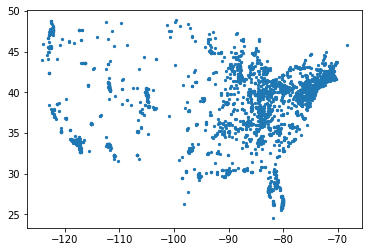

In [82]:
plt.scatter(df_['Longitude'], df_['Latitude'], s = 5)
plt.savefig(fname = 'tt.png', dpi = 300)

In [21]:
import geopandas as gpd
from shapely.geometry import Polygon
lfb = -130 #-180
rgb = -60
ub = 50 #80
lb = 20 #10
target_poly = Polygon([[lfb, ub], [lfb, lb], [rgb, lb],[rgb, ub]])

In [26]:
gdf_us = gpd.read_file('cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
gdf_us_ = gdf_us[gdf_us['geometry'].intersects(target_poly)].copy()

In [28]:
gdf_us_.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


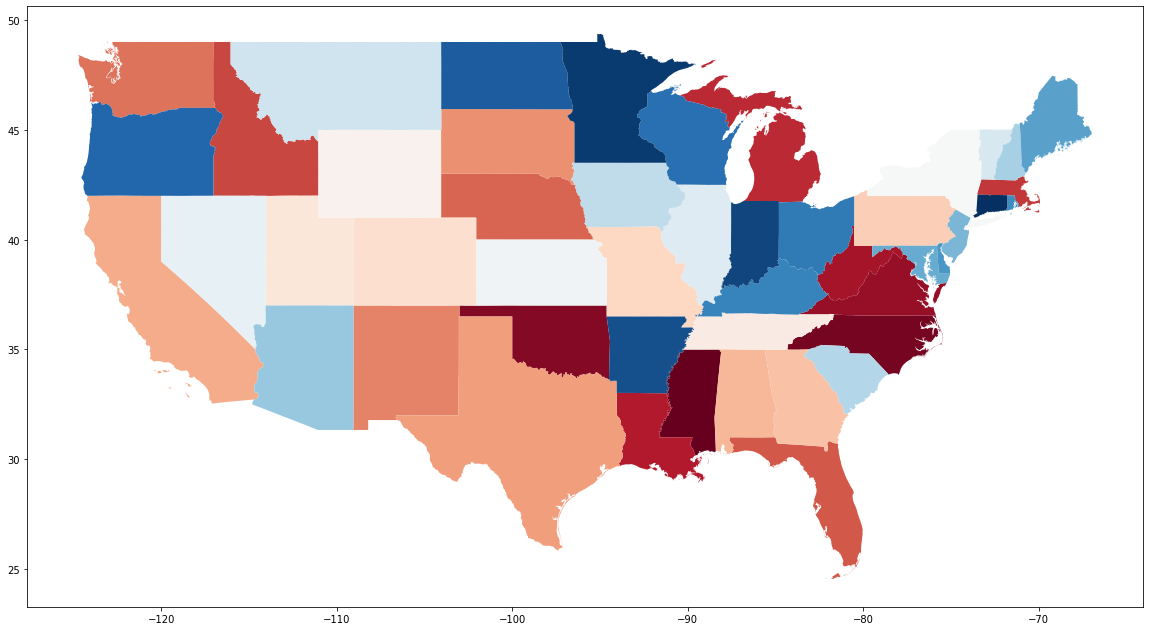

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(20,20))
gdf_us_.plot(scheme='quantiles', cmap='RdBu', ax=ax) 

In [41]:
df_statecounts = df.groupby('STATE').size().to_frame().reset_index()
df_statecounts.rename(columns={0:'Count'}, inplace=True) 

In [46]:
pd.merge(gdf_us_, df_statecounts, how='left', left_on='STUSPS', right_on='STATE')
#both tables includes 49 states

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,STATE,Count
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",MS,9
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",NC,92
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",OK,6
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",VA,76
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",WV,30
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ...",LA,59
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ...",MI,101
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ...",MA,152
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3...",ID,53
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",FL,224
